In [3]:
import pandas as pd

df1 = pd.read_csv("air_quality_data2019.csv")
df2 = pd.read_csv("air_quality_data2020.csv")
df3 = pd.read_csv("air_quality_data2021.csv")
df4 = pd.read_csv("air_quality_data2022.csv")
df5 = pd.read_csv("air_quality_data2023.csv")

df = pd.concat([df1, df2, df3, df4, df5])
df.reset_index(drop=True, inplace=True)
df = df.sort_values(by=['zipCode', 'DateObserved'])
df['zipcode'] = df['zipCode'].astype(str).str.zfill(5)
df.to_csv("merged_air_quality_data.csv", index=False)

pivot_df = df.pivot(index=['DateObserved', 'zipCode'], columns='ParameterName', values=['AQI', 'CategoryName'])
pivot_df.columns = [f'{name}_{param}' for name, param in pivot_df.columns]
pivot_df.reset_index(inplace=True)

pivot_df = pd.merge(pivot_df, df[['DateObserved', 'zipCode', 'Longitude', 'Latitude']].drop_duplicates(), on=['DateObserved', 'zipCode'], how='left')

pivot_df.rename(columns={'DateObserved': 'Date', 'zipCode': 'ZipCode'}, inplace=True)
pivot_df.to_csv("filtered_air_quality_data.csv", index=False)

In [4]:
import pandas as pd

df = pd.read_csv('filtered_air_quality_data.csv')

zipcode_means = df.groupby('ZipCode').agg({'AQI_OZONE': 'mean', 'AQI_PM10': 'mean', 'AQI_PM2.5': 'mean'})

def max_category(series):
    if not series.empty:
        return series.value_counts().idxmax()
    else:
        return None

aqi_columns = ['AQI_OZONE', 'AQI_PM10', 'AQI_PM2.5']
for aqi_column in aqi_columns:
    df[aqi_column] = df[aqi_column].apply(lambda x: x if not pd.isna(x) else None)

for category_column in ['CategoryName_OZONE', 'CategoryName_PM10', 'CategoryName_PM2.5']:
    non_empty_data = df.dropna(subset=[category_column])
    zipcode_means[category_column] = non_empty_data.groupby('ZipCode')[category_column].apply(max_category)

zipcode_means[['Latitude', 'Longitude']] = df.groupby('ZipCode')[['Latitude', 'Longitude']].first()

zipcode_means.to_csv('air_quality_summary.csv')
print(zipcode_means)


         AQI_OZONE  AQI_PM10  AQI_PM2.5 CategoryName_OZONE CategoryName_PM10  \
ZipCode                                                                        
2108     32.302326    14.156  33.431573               Good              Good   
2109     32.302326    14.156  33.431573               Good              Good   
2110     32.302326    14.156  33.431573               Good              Good   
2111     32.302326    14.156  33.431573               Good              Good   
2113     32.302326    14.156  33.431573               Good              Good   
2114     32.302326    14.156  33.431573               Good              Good   
2115     32.302326    14.156  33.431573               Good              Good   
2116     32.302326    14.156  33.431573               Good              Good   
2118     32.302326    14.156  33.431573               Good              Good   
2119     32.302326    14.156  33.431573               Good              Good   
2120     32.302326    14.156  33.431573 

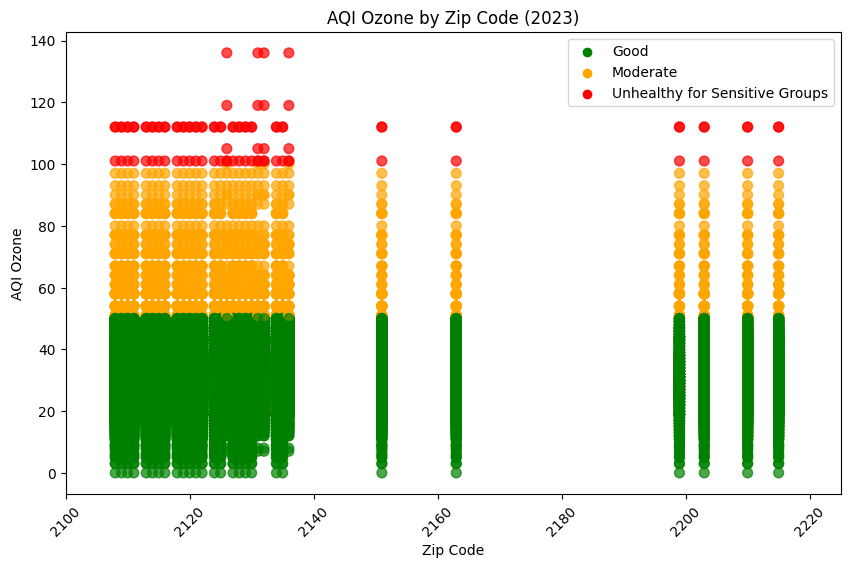

Zip Codes with Red AQI (Unhealthy for Sensitive Groups):
2108
2109
2110
2111
2113
2114
2115
2116
2118
2119
2120
2121
2122
2124
2125
2127
2128
2129
2130
2134
2135
2151
2163
2199
2203
2210
2215
2126
2131
2132
2136


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('filtered_air_quality_data.csv')

def map_category_to_color(category):
    if category == 'Good':
        return 'green'
    elif category == 'Moderate':
        return 'orange'
    elif category == 'Unhealthy for Sensitive Groups':
        return 'red'
    else:
        return 'blue'  
    
data['CategoryColor'] = data['CategoryName_OZONE'].apply(map_category_to_color)

zip_code_range = (2100, 2225) 
filtered_data = data[(data['ZipCode'] >= zip_code_range[0]) & (data['ZipCode'] <= zip_code_range[1])]

plt.figure(figsize=(10, 6))


plt.scatter(filtered_data['ZipCode'], filtered_data['AQI_OZONE'], c=filtered_data['CategoryColor'], s=50, alpha=0.7)
plt.title('AQI Ozone by Zip Code (2023)')
plt.xlabel('Zip Code')
plt.ylabel('AQI Ozone')
plt.xticks(rotation=45)

legend_labels = {
    'Good': 'green',
    'Moderate': 'orange',
    'Unhealthy for Sensitive Groups': 'red',
}
for category, color in legend_labels.items():
    plt.scatter([], [], label=category, color=color)

plt.legend()

plt.xlim(zip_code_range)

plt.show()

red_aqi_zip_codes = filtered_data[filtered_data['CategoryName_OZONE'] == 'Unhealthy for Sensitive Groups']['ZipCode']

# Print the list of Zip Codes with "Red" AQI
print("Zip Codes with Red AQI (Unhealthy for Sensitive Groups):")
for zip_code in red_aqi_zip_codes.unique():
    print(zip_code)


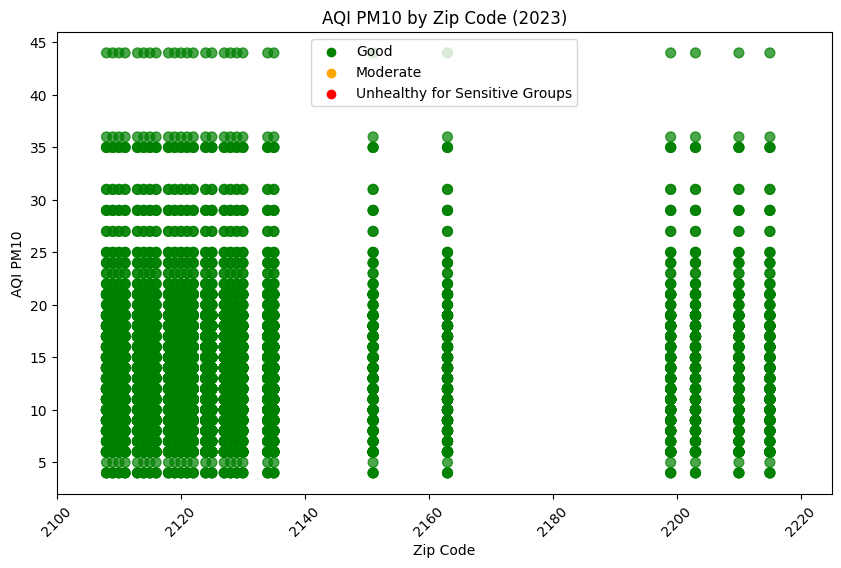

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('filtered_air_quality_data.csv')

def map_category_to_color(category):
    if category == 'Good':
        return 'green'
    elif category == 'Moderate':
        return 'orange'
    elif category == 'Unhealthy for Sensitive Groups':
        return 'red'
    else:
        return 'blue'  

data['CategoryColor'] = data['CategoryName_PM10'].apply(map_category_to_color)

zip_code_range = (2100, 2225) 
filtered_data = data[(data['ZipCode'] >= zip_code_range[0]) & (data['ZipCode'] <= zip_code_range[1])]
plt.figure(figsize=(10, 6))

plt.scatter(filtered_data['ZipCode'], filtered_data['AQI_PM10'], c=filtered_data['CategoryColor'], s=50, alpha=0.7)
plt.title('AQI PM10 by Zip Code (2023)')
plt.xlabel('Zip Code')
plt.ylabel('AQI PM10')
plt.xticks(rotation=45)

legend_labels = {
    'Good': 'green',
    'Moderate': 'orange',
    'Unhealthy for Sensitive Groups': 'red',
}
for category, color in legend_labels.items():
    plt.scatter([], [], label=category, color=color)

plt.legend()

plt.xlim(zip_code_range)


plt.show()


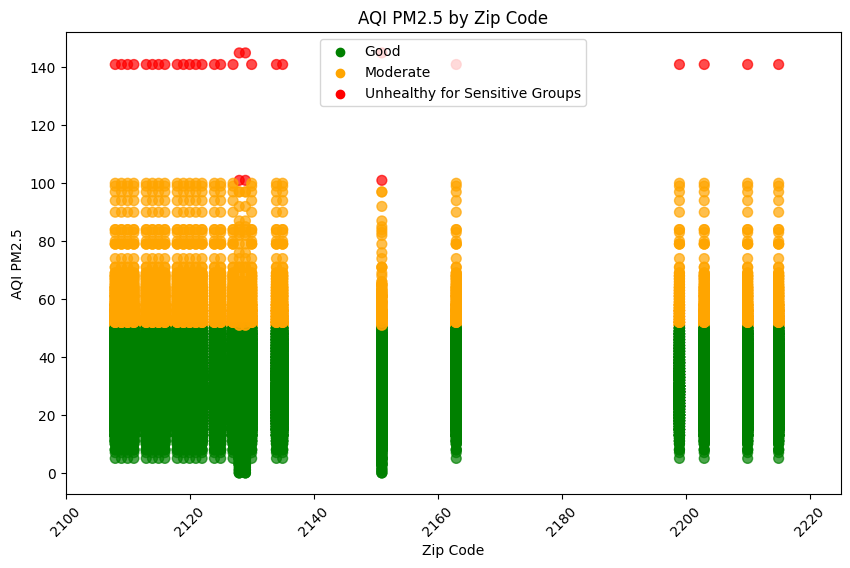

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('filtered_air_quality_data.csv')

def map_category_to_color(category):
    if category == 'Good':
        return 'green'
    elif category == 'Moderate':
        return 'orange'
    elif category == 'Unhealthy for Sensitive Groups':
        return 'red'
    else:
        return 'blue'  # You can add more colors for other categories

# Map the CategoryName to colors
data['CategoryColor'] = data['CategoryName_PM2.5'].apply(map_category_to_color)

# Define the range of zip codes you want to display
zip_code_range = (2100, 2225)  # Adjust this range as needed

# Filter the data to include only the selected zip code range
filtered_data = data[(data['ZipCode'] >= zip_code_range[0]) & (data['ZipCode'] <= zip_code_range[1])]

# Create the scatter plot
plt.figure(figsize=(10, 6))


plt.scatter(filtered_data['ZipCode'], filtered_data['AQI_PM2.5'], c=filtered_data['CategoryColor'], s=50, alpha=0.7)
plt.title('AQI PM2.5 by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('AQI PM2.5')
plt.xticks(rotation=45)

# Create a legend for the categories
legend_labels = {
    'Good': 'green',
    'Moderate': 'orange',
    'Unhealthy for Sensitive Groups': 'red',
}
for category, color in legend_labels.items():
    plt.scatter([], [], label=category, color=color)

plt.legend()

# Set the x-axis limits to your desired zip code range
plt.xlim(zip_code_range)


plt.show()
